# Maths - Linear Algebra ( Vectors and Matricies )  
In this tutorial I will be jumping backwards and forwards from the book into youtube tutorials in order to understand it at a deeper level, rather than just reading the book and typing!

What is linear algebra? Linear algebra is a branch of maths that studies vector spaces (vector space is a group of vectors / a set of vectors), and linear transformations between vector spaces, such as rotating a shape, scaling it up or down, translating (moving) it and so on... 

Machine learning relies heavily on linear algebra so it is essentail we understand what vectors and matricies are, what operations we can perform using them and how they can be useful to us!!!!


# Vectors 

A vector is a quantity defined by a magnitued and direction. 

What is a vector? A vector is a **quantity defined by a magnitude and a direction**. For example, a rocket's velocity is a 3-dimensional vector. Its magnitude, is the speed of the rocket and its direction (hopefully up lol). A vector can be represented by an array of numbers (these are called **'scalars'**) each of these scalars corresponds to a magnitude of the vector with regards to each dimension

For example, lets say that the rocket is going up at a slight angle. It has a vertical speed of 5000 m/s, and also a slight speed towards the East at 10 m/s and a slight speed to the North at 50 m/s. The rockets velocity may be represented by the following vector. 

**velocity** $ = \begin{pmatrix} 10\\50\\5000\\\end{pmatrix}$

Note, by convention vectors are presented in the form of columns. Also, vector names are general lowercase to distinguish them from matricies (these will be spoken about later on) as well as lowercase they are usually in bold, this distinguishes them from scalar values such as meters_per_second = 5026.

But from a computer science perspective, we simply think as vectors as a list of numbers, for example if we wanted to model a house and all we cared about was the square footage and price, we could give it a vecor with the square footage of the house and the price at which it is being sold at where we are modeling the house as a 2D vector!

A list of N numbers may also represent the coordinates of a point in N-dimesnional space, so it is quite frequent to represent vectors as simple points instead of arrows. A vector with 1 element may be represented as an arrow or a point on an axis, a vector with 2 elements is an arrow or a point on a place, a vector with 3 elements is an arrow or point in space, a vector with N elements is a arrow or point in N-dimensional space (which most people find hard to imagine.) 

### Purpose 

Vectors have MANY purposes in machine learning, most notably to **represent observations and predictions.** For example, lets say we built a machine learning system to classify videos into 3 catagories (good, spam, clickbait) based on what we know about them. For each video, we would have a vector representing what we know about it such as...

**video** $ = \begin{pmatrix} 10.5\\5.2\\3.25\\7.0\\\end{pmatrix}$

This vector represents a video that lasts 10.5 mins, but only 5.2% of viewers wathcing for more than a minute, its gets 3.25 views per day on average and it was flagged 7 times as spam. As we can see, each axis has a different meaning. 

Based on this vector, our machine learning system may predict that there is an 80% probabaility that this is a spam video, 18% that this is clickbait, and 2% that is a good video, this could be represented as the following vector...

**class_probabilities** $ = \begin{pmatrix} 0.80\\0.18\\0.02\\\end{pmatrix}$

When thinking about vectors, we can imagine each value as a scalar, that scales the vector in a certain direction. In this system there are 2 really important vectors, the one that goes to right to point 0,1 called $\hat{i}$ and the one that goes straight up to the point 1,0 called $\hat{j}$. Now we need to think of the x coord of our vector as the scalar the stretches $\hat{i}$ to a certain point on the x axis and the y coord of our vector as the scalar that stretches the $\hat{j}$ to a point on the Y axis! These two vectors are called the basis vectors, these are what the scalars basically scale. 

### Vectors in Python 

In python, a vector can be represented in many ways. The simplest being a regular list of numbers:

In [1]:
# A simple representation of a vector as a list of numbers
[10.5, 5.2, 3.25, 7.0]

[10.5, 5.2, 3.25, 7.0]

Since we plan to do quite a lot of scientific calculations, it is much better to use NumPys 'ndarray', which provides alot of convenient and optimised implementations of essential mathematical operations on vectors, this will make our work much easier if we use NumPy to do the heavy lifting (check the Numpy tutorial).

Lets see a quick example however

In [2]:
import numpy as np
video = np.array([10.5, 5.2, 3.25, 7.0])
video

array([10.5 ,  5.2 ,  3.25,  7.  ])

The size or a vector can be obtained using the size attribute

In [3]:
# getting the size of the vector
video.size

4

The i$^{th}$ element (also called entry or item) of a vector **v** is noted **v**$_{i}$. Note that indicies in mathematics generally start at 1, but in programming they usually start with 0. so to access **video**$_{3}$ programmatically, we need to do.

In [4]:
# accessing the 3rd element of of the video vector
video[2]

3.25

### Plotting Vectors

Lets create some simple 2D vector plots

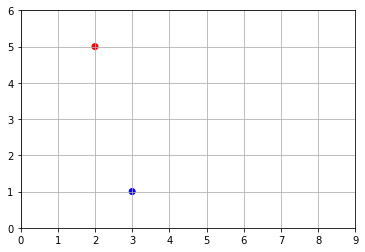

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

# creating the vectors
u = np.array([2, 5])
v = np.array([3, 1])

# These vectors each have 2 elements each, so they can easily be 
# represented graphically on a 2D graph as points.
x_coordinates, y_coordinates = zip(u, v)
plt.scatter(x_coordinates, y_coordinates, color=['r', 'b'])
plt.axis([0,9 , 0,6])
plt.grid()
plt.show()

Vectors can also be represented as arrows, let's create a small function to draw the arrows.

In [6]:
# creating a function that creates the arrows for the vector plot
def plot_vector_arrows(vector2d, origin=[0,0], **options):
    return plt.arrow(origin[0], origin[1], vector2d[0], vector2d[1],
                    head_width=0.2, head_length=0.3, length_includes_head=True,
                    **options)

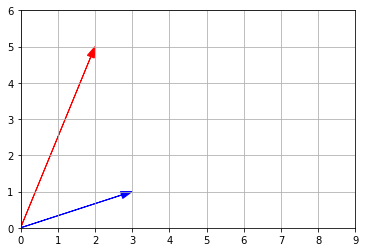

In [7]:
plot_vector_arrows(u, color='r')
plot_vector_arrows(v, color='b')
plt.axis([0,9 , 0,6])
plt.grid()
plt.show()

Lets plot some 3D vectors, first we have to create some 3D vectors to plot...

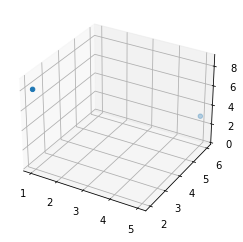

In [8]:
from mpl_toolkits.mplot3d import Axes3D

# creating the 3D vectors
a = np.array([1,2,8])
b = np.array([5,6,3])

# now lets plot these vectors using matplotlibs 'Axes3D'
subplot_3d = plt.subplot(111, projection='3d')
x_coordinates, y_coordinates, z_coordinates = zip(a, b)
subplot_3d.scatter(x_coordinates, y_coordinates, z_coordinates)
subplot_3d.set_zlim3d([0, 9])
plt.show()

It is hard to visualise exactly where in the 3D space these points are, so lets add vertical lines. We will create a small function to plot a list of 3d vecotrs with the vertical lines attached to them.

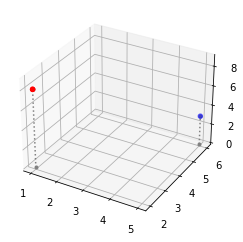

In [9]:
# creating a function that helps plot a better 3d graph
def plot_3d_vectors(ax, vectors3d, z0, **options):
    for v in vectors3d:
        x, y, z = v
        ax.plot([x,x], [y,y], [z0,z], color='gray', linestyle='dotted', marker='.')
        x_coordinates, y_coordinates, z_coordinates = zip(*vectors3d)
        ax.scatter(x_coordinates, y_coordinates, z_coordinates, **options)

# calling the function
subplot_3d = plt.subplot(111, projection='3d')
subplot_3d.set_zlim([0, 9])
plot_3d_vectors(subplot_3d, [a,b], 0, color=('r', 'b'))
plt.show()

### The Norm

The norm is a function that maps a vector to a single non-negative number, this can help is compare vectors for similarity / dissimilarity

The norm of a vector such as **u** is noted as ||**u**||. This is a mesaure of the length (the magnitude) of the vector **u**. There are multiple possible norms, but the most common one is the **Euclidian norm**, which is defined as: 

||**u**|| $ = \sqrt{\sum_{i=1}{u_{i}}^2}$

We can implement this easily in pure python as the $ \sqrt{x} = x ^\frac{1}{2}$ (kinda cool) 

In [10]:
# creating a function that computes the vector norm
def vector_norm(vector):
#   computing the squares for each element in the vector
    squares = [element**2 for element in vector]
#   returns the x to the power of 0.5
    return sum(squares)**0.5

# printing off the vector norm for the vector u 
print('||', u, '|| =', vector_norm(vector=u))

|| [2 5] || = 5.385164807134504


However, this is python and there is always an easier way to do it. We are goibg to use NumPys norm function, avaiable in the linalg (Linear Algebra) module:

In [11]:
import numpy.linalg as la
# computing the norm using the norm function from the linalg module
la.norm(u)

5.385164807134504

Lets plot a figure to prove that the norm of vector u is infact around 5.4

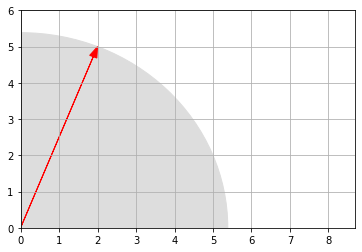

In [12]:
# creating the radius
radius = la.norm(u)
# plotting the figure
plt.gca().add_artist(plt.Circle((0,0), radius, color="#DDDDDD"))
plot_vector_arrows(u, color="red")
# setting the axis
plt.axis([0, 8.7, 0, 6])
# setting the grid behind
plt.grid()
plt.show()

This looks right (look at the x and y axis) 

### Addition of Vectors 

Vectors of the same size can be added together, the addition is performed 'elementwise', this is also called matrix addition. We do this for every element in the vector, for example.

In [13]:
print(' ', u)
print('+', v)
print('-' * 10)
u + v

  [2 5]
+ [3 1]
----------


array([5, 6])

2 + 3 = 5 and 5 + 1 = 6. I like to think of it as imagine we are picking one of the vectors up and placing it ontop, what would the result be? Sort of stacking the numbers on top of eachother. 

Lets plot this vector addition on a figure

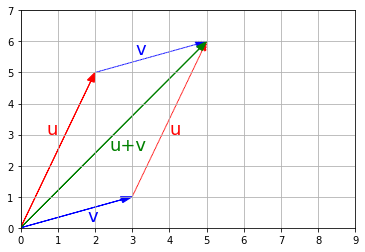

In [14]:
# plotting the original arrows
plot_vector_arrows(u, color='r')
plot_vector_arrows(v, color='b')

# plotting the "imaginary" arrows
plot_vector_arrows(u, origin=v, color='r', linestyle='dotted')
plot_vector_arrows(v, origin=u, color='b', linestyle='dotted')

# plotting the vector of the added vectors
plot_vector_arrows(u+v, color='g')

# setting up the plot
plt.axis([0,9 , 0,7])

# setting up some text (notice we set the coords of the text, then the colour + size)
plt.text(0.7, 3, "u", color="r", fontsize=18)
plt.text(4, 3, "u", color="r", fontsize=18)
plt.text(1.8, 0.2, "v", color="b", fontsize=18)
plt.text(3.1, 5.6, "v", color="b", fontsize=18)
plt.text(2.4, 2.5, "u+v", color="g", fontsize=18)
# setting up the grid 
plt.grid()


plt.show()

Vector addition is **'communtative'**, this is a term that means that **u** + **v** = **v** + **u**. We can see on the figure above that when we add u and v it ends up in the same place as adding v and u.

Vector addition is also **'associative'**, meaning that **u** + (**v** + **w**) = (**u** + **v**) + **w**.

**Now we are getting mathsy.** If we have a shape that is defined by a number of points (a number of vectors), as we add a vector to all of these points, then the whole shape gets shiftered by **v**. This is called **'geometric translation'**.

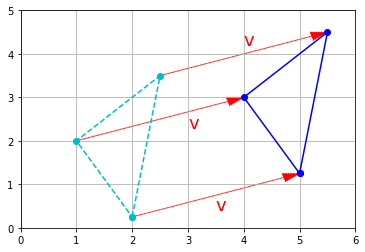

In [15]:
# setting the original points (vectors)
original_point1 = np.array([2, 0.25])
original_point2 = np.array([2.5, 3.5])
original_point3 = np.array([1, 2])

# plotting the original points (we have to add original twice as it completes the triangle)
x_coordinates, y_coordinates = zip(original_point1, original_point2, original_point3, original_point1)
plt.plot(x_coordinates, y_coordinates, "c--", x_coordinates, y_coordinates, "co")

# plotting the translation arrows (where the points in space are moving too)
plot_vector_arrows(v, original_point1, color='r', linestyle=':')
plot_vector_arrows(v, original_point2, color='r', linestyle=':')
plot_vector_arrows(v, original_point3, color='r', linestyle=':')

# creating the new points by adding vector v to all of the points in space
new_point1 = original_point1 + v
new_point2 = original_point2 + v 
new_point3 = original_point3 + v

# plotting the new points (again placing the first point twice as it completes the triangle)
x_coordinatesb, y_coordinatesb = zip(new_point1, new_point2, new_point3, new_point1)
plt.plot(x_coordinatesb, y_coordinatesb, 'b-', x_coordinatesb, y_coordinatesb, 'bo')

# plotting the text for the figure
plt.text(4, 4.2, "v", color="r", fontsize=18)
plt.text(3, 2.3, "v", color="r", fontsize=18)
plt.text(3.5, 0.4, "v", color="r", fontsize=18)
         
# setting the axis and grid
plt.axis([0, 6, 0, 5])
plt.grid()
plt.show()


NOTE: That subtracting a vector works the same way, but all we are doing is adding the opposite vector (from my understanding we would be adding negative elements) so instead of all of the values in v being positive they would be negative, this would cause a subtraction. 

### Muliplication by a Scalar

Vectors can not just be added and subtracted but they can also be multiplied. This multiplication by scalar means that all elements in the vector are multiplied by that number, for example.

In [16]:
# example of multiplication by a scalar
print('1.5 *', u, '=', (1.5*u))

1.5 * [2 5] = [3.  7.5]


Here we can see that we have multiplied all of the values in the vector **u** by 1.5. 

Graphically, scalar multiplications results in changing the 'scale' of the figure (multiplication by scalar changes the 'scale', scale scale scale) hence the name scalar. The distance from the origin (the point at which the coordinated equals to zero) is also multiplied by the scalar. For example, let us scale up by a factor of k = 2.5. 

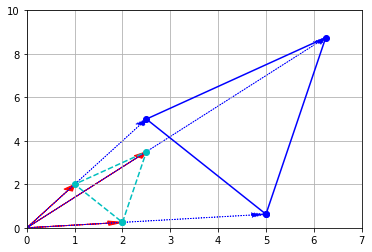

In [17]:
# setting k 
k = 2.5

# multiplying the vectors by k 
scaled_point1 = k * original_point1
scaled_point2 = k * original_point2
scaled_point3 = k * original_point3

# plotting the original points
plt.plot(x_coordinates, y_coordinates, 'c--', x_coordinates, y_coordinates, 'co')

# plotting the original arrows
plot_vector_arrows(original_point1, color='r')
plot_vector_arrows(original_point2, color='r')
plot_vector_arrows(original_point3, color='r')

# setting the scaled coordinates and plotting them
x_coordinatesc, y_coordinatesc = zip(scaled_point1, scaled_point2, scaled_point3, scaled_point1)
plt.plot(x_coordinatesc, y_coordinatesc, 'b-', x_coordinatesc, y_coordinatesc, 'bo')

# plotting the arrows (here we are not using the scaled points)
plot_vector_arrows(k * original_point1, color='b', linestyle=':')
plot_vector_arrows(k * original_point2, color='b', linestyle=':')
plot_vector_arrows(k * original_point3, color='b', linestyle=':')

# setting up the axis and grid 
plt.axis([0,7,0,10])
plt.grid()
plt.show()

Much like subtraction, dividing a vector by a scaler is equalivalent to multiplying by its multiplicative inverse. Such that...

$\frac{u}{\lambda} = \frac{1}{\lambda} \times u $

The multiplicative inverse is the opposite really, so $\frac{1}{5}$s multiplicative inverse is 5, and 5s mutiplicated inverse is $\frac{1}{5}$.

Scalar multiplication much like addition is also **'commuative'** such that ${\lambda}\times u = u \times \lambda$

Scalar multiplication is also **'associative'** like vector addition $\lambda_1 \times(\lambda_2 \times u) = (\lambda_1 \times \lambda_2) = u $

Finally, it is **'distributive'** over addition of vectors $\lambda \times (u + v) = \lambda \times u + \lambda \times v $


### Zero, Unit and Normalized Vectors

- A **zero vector** is a vector **full of 0s**
- A **unit vector** is a vector with a **norm equal to 1**
- The **normalized vector** of a non-null vector is noted by ^ such that non null vector **u** is noted as $\hat{u}$. This is the **unit vector** that points in the same direction as **u**. It is equal to $\hat{u} = \frac{u}{||u||}$
- Note that ||u|| is the 'norm' of u

Lets plot this...

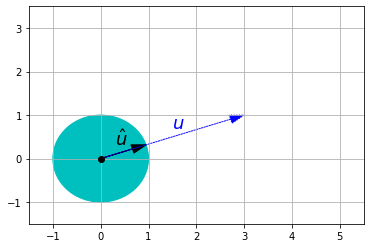

In [18]:
# setting up the circle in the plot
plt.gca().add_artist(plt.Circle((0,0),1,color='c'))
plt.plot(0, 0, "ko")

# plotting the vector arrows (note the normalised vector)
plot_vector_arrows(v / la.norm(v), color="k")
plot_vector_arrows(v, color="b", linestyle=":")

# plotting the text in the figure
plt.text(0.3, 0.3, "$\hat{u}$", color="k", fontsize=18)
plt.text(1.5, 0.7, "$u$", color="b", fontsize=18)
plt.axis([-1.5, 5.5, -1.5, 3.5])
plt.grid()
plt.show()

### Dot Products

A dot product (also called a scaler product or an inner product) of two vectors **u** and **v** is a useful operation that comes up fairly often in linear algebra. The dot product of two vectors is noted in several ways such that $ u \cdot v$ or sometimes (u|v) or $\langle u | v \rangle$ and the dot product is defined as

$ u \cdot v = ||u|| \times ||v|| \times \cos{(\theta)}$

$\theta$ is the angle between **u** and **v**

or...

$ u \cdot v = \sum_i u_i \times v_i$

We can manually work out the dot product by hand in python

In [19]:
def dot_product(v1, v2):
    return sum(v1i * v2i for v1i, v2i in zip(v1, v2))

dot_product(u, v)

11

However just like everything there is an easier way to do it, we can use the dot method of a numpy array

In [20]:
np.dot(u,v)

11

We can also do it as a dot method of a ndarry

In [21]:
u.dot(v)

11

NOTE that using * does not get the dot product it performs the elementwise multiplication

In [22]:
print("  ",u)
print("* ",v, "(NOT a dot product)")
print("-"*10)

u * v

   [2 5]
*  [3 1] (NOT a dot product)
----------


array([6, 5])

So what are the properties of the dot product

- The dot product is **'communtative'** so $u \cdot v = v \cdot u$
- The dot product is only defined **between two vectors**, not between a scalar and a vector. This means that we cannot chain dot products together, for example $ u \cdot v \cdot w $ since $u \cdot v $ will be a scalar after it is computed and w will be a vector
- Dot products are **NOT associative** such that $(u \cdot v) \cdot w \neq u \cdot (v \cdot w) $ since neither are defined
- However the drop product **is associative** in regard to scaler multiplication such that $\lambda \times (u \cdot v) = (\lambda \times u) \cdot v = u \cdot (\lambda \times v)$
- Finally the dot product is **'disruptive'** over vector additions such that $ u \cdot (v + w) = u \cdot v + u \cdot w$

### Calculating the Angle Between Vectors

One of the many **uses of the dot product** is to **calculate the angle betwen the two non zero vectors**. Looking at the dot product definintion $ u \cdot v = ||u|| \times ||v|| \times \cos{(\theta)}$ we can duduce the following formula...

$\theta = arccos (\frac{u \cdot v} {||u\times||v||}) $

Note that if $u \cdot v = 0$, it follows that $\theta = \frac{\pi}{2}$. In other words, if the dot prduct of two non null vectors is zeo it means that are are orthogonal (at right angles). 

Lets use this formula to calculate the angle between u and v in radians (unit of angular measurement)

In [23]:
def calc_vector_angle(u, v):
    cos_theta = u.dot(v) / la.norm(u) / la.norm(v)
    return np.arccos(np.clip(cos_theta, -1, 1))

theta = calc_vector_angle(u, v)
print("Angle =", theta, "radians")
print("      =", theta * 180 / np.pi, "degrees")

Angle = 0.8685393952858895 radians
      = 49.76364169072618 degrees


NOTE - Due to small floating point errors, cos_theta may be very slightly outside of the [-1,1] interval which would make arccos fail. This is why we clipped the value within range using NumPys clip function. 

### Projecting a Point Onto an Axis

The dot product is also very useful to project points onto an axis. This projection of vector **v** onto **u**'s axis is given by the following formula

**proj**$_u v = \frac{u\cdot v}{||u||^2} \times u$

This equation is equlivalent to 

**proj**$_u v = (v\cdot \hat{u}) \times \hat{u}$


Lets plot this and see what it is doing

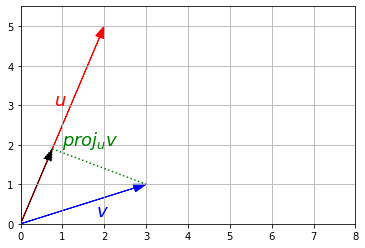

In [24]:
# creating u normalised (why though?)
u_normalised = u /la.norm(u)
# projecting u onto v
proj = v.dot(u_normalised) * u_normalised

# plotting the arrows for the original u and v 
plot_vector_arrows(u, color="r")
plot_vector_arrows(v, color="b")

# plotting the projection arrow
plot_vector_arrows(proj, color="k", linestyle=":")
plt.plot(proj[0], proj[1], "k")

# plotting the dotted line from v to v projected onto u
plt.plot([proj[0], v[0]], [proj[1], v[1]], "g:")

# plotting the text
plt.text(1, 2, "$proj_u v$", color="g", fontsize=18)
plt.text(1.8, 0.2, "$v$", color="b", fontsize=18)
plt.text(0.8, 3, "$u$", color="r", fontsize=18)

# creating the axis and grid
plt.axis([0, 8, 0, 5.5])
plt.grid()
plt.show()

# Matricies

A matirx is a rectangular array of scalars (any number: integer, real or complex) arranged in rows and columns


$
\begin{bmatrix}
1 & 2 & 3\\
a & b & c
\end{bmatrix}
$

We can also think of a matrix as a **list of vectors** : The matrix above contains either 2 horizontal 3D vectors or 3 vertical 2D vectors. Matrices are convenient and very efficient to run operations on many vectors at one time. We will also see that they are great at representing and performing linear transformations such as rotations, translations and scaling. 


### Matrices in Python

In python a matrix can be represented in various ways. The simplest representation is just a list of python lists.

In [25]:
[
    [10, 20, 30],
    [40, 50, 60]
]

[[10, 20, 30], [40, 50, 60]]

A much more efficient way is to use the NumPy library which provides optimized implementations of many matrix operations.

In [26]:
A = np.array([
        [10, 20, 30],
        [40, 50, 60]])

A

array([[10, 20, 30],
       [40, 50, 60]])

By convention matrices generally have uppcarse names such as A. In the rest of the tutorial, we are going to be using NumPy arrays (type ndarray) to represent matrices. 

### Size 

The size of a matrix is defined by its number of rows and number of columns. It is noted by $rows \times columns$. For example the matrix A_matrix is an example of a 2 x 3 matrix. 2 rows and 3 columns, if it was a 3 x 2 matrix it would have 3 rows and only 2 columns. THIS DOES MATTER the rows comes first then the columms.

To get a matrix's size we can use NumPy

In [27]:
# using numpy to get the matrices shape
A.shape

(2, 3)

CAUTION the .size attribute represents the number of elements in the ndarry that makes up the matrix so DO NOT confuse it!

In [28]:
A.size

6

### Element Indexing 

The number locating the in $i^{th}$ row of the $j{^th}$ column of a matrix X is noted at $X{_ij}$ but there is not standard notation (the book says), so people often prefaer to explicitly name the elements like this 
"Let **X** = $(x_{i,j})$$_{1\le i\le m, 1\le j\le n}$

This means that **X** is equal to

$X = \begin{bmatrix}
x_{1,1} & x_{1,2} & x_{1,3} & \cdots & x_{1,n}\\
x_{2,1} & x_{2,2} & x_{2,3} & \cdots & x_{2,n}\\
x_{3,1} & x_{3,2} & x_{3,3} & \cdots & x_{3,n}\\
\vdots & \vdots & \vdots & \ddots & \vdots \\
x_{m,1} & x_{m,2} & x_{m,3} & \cdots & x_{m,n}\\
\end{bmatrix}$

However in this tutorial we will use the $X_{ij}$ notation as it matches well with NumPys notation. Note that in math, indicies generally start at 1, but in programming they start at 0 (we have spoken about this before) 

In [29]:
# accessing the second row and the 3rd number
A[1,2]

60

The $i^{th}$ row vector is noted as $M_i,{_*}$ but again there is no standard notation so people will often prefer to explicitly define their own names, for example "let **x**$_i$ be the $i^{th}$ row vector of matrix **X**". We will use the $M_i,{_*}$. For example is we want to access A matrix second row vector it will be noted at A_matrix$_2{_*}$

In [30]:
# accessing the second row, all of the values 
A[1, :]

array([40, 50, 60])

Just like the rows the $j^th$ column vector is noted as $M_{_*},_j$ but again their is no standard notation. We will be using the example we have just mentioned through the tutorial however. For example if we want to get the A_matrix 3rd column it will be noted A_matrix$_{_*},_3$

In [31]:
A[:, 2]

array([30, 60])

Note that the result is actually a 1D NumPy array. There is no such thing as a vertical or horizontal one dimensional array. 

If you need to actaully represent a row vector as a one-row matrix (ie a 2D numpy array) or a column vector as a one-column matrix, then you need to use a slice instead of an integer when accessing the row or column

For the example we have been using

In [32]:
A[1:2, :] # rows 2 and 3 are excluded and this returns row 2 as
                 # a one row matrix

array([[40, 50, 60]])

In [33]:
A[:, 2:3] # columns 3 to 4 are excluded, this returns column 3
                 # as a one column matrix 

array([[30],
       [60]])

### Square, Triangular, Diagonal and Identity Matrices

A square matrix is a matris that has the same number of rows as it does columns, for example 3X3 matrix.


$
\begin{bmatrix}
1 & 2 & 3\\
4 & 5 & 6\\
7 & 8 & 9\\
\end{bmatrix}
$

An upper triangular matrix is a special kind of square matrix where all of the elements below the main diagonal are zero, for example.

$
\begin{bmatrix}
1 & 2 & 3\\
0 & 4 & 5\\
0 & 0 & 6\\
\end{bmatrix}
$

Similary we also can get a lower triangular matrix, this is a square matrix where all the elements above the main diagonal are zero, for example. 

$
\begin{bmatrix}
1 & 0 & 0\\
2 & 3 & 0\\
4 & 5 & 6\\
\end{bmatrix}
$


A matrix that is both upper and lower triangular is called a diagonal matrix, for example.

$
\begin{bmatrix}
1 & 0 & 0\\
0 & 2 & 0\\
0 & 0 & 3\\
\end{bmatrix}
$


We can construct a diagonal matrix using NumPys diag function. 

In [34]:
np.diag([1,2,3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

We can also pass the diagonal function to a matrix and numpy will extract the main diagonal out for us. 

In [35]:
B = np.array([
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9],
    ])

np.diag(B)

array([1, 5, 9])

Finally the identity matrix of size $n$, is noted as $I_n$. This is a diagonal matrix of the size $n \times n$ with 1's in the main diagonal for example $I_3$ is displayed below.

For this, we can use np.diag([1,1,1]) or becuase there is always an easier way we can just use np.eye(3) this will construct the indentity matrix without us having the type in all of the ones directly

In [36]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

The indentity matrix is often noted as simply $I$ instead of $I_n$ when its size is clearly given in the context. It is called the identity matrix because multiplying a matrix with it leave the matrix unchanged as we will see below. 

### Adding Matrices

If two matrices Q and R have the same size $m \times n$, they can be added together!!! Addition is performed 'elementwise' the result of the addition is also an $m \times n$ matrix $S$ where each element in matrix $S$ is the sum of the elements at the corresponding position. $S_{i,j} = Q_{i,j} + R_{i,j}$

$S =
    \begin{bmatrix}
    Q_{11} + R_{11} & Q_{12} + R_{12} & Q_{13} + R_{13} & \cdots & Q_{1n} + R_{1n}\\
    Q_{21} + R_{21} & Q_{22} + R_{22} & Q_{23} + R_{23} & \cdots & Q_{2n} + R_{2n}\\
    Q_{31} + R_{31} & Q_{32} + R_{32} & Q_{33} + R_{33} & \cdots & Q_{3n} + R_{3n}\\
    \vdots & \vdots & \vdots & \ddots & \vdots\\
    Q_{m1} + R_{m1} & Q_{m2} + R_{m2} & Q_{m3} + R_{m3} & \cdots & Q_{mn} + R_{mn}\\
    \end{bmatrix}$
    
Again just like a vector, I like to think of it like we have the same size box of numbers and what we are doing is placing the box of numbers ontop of the original box and the numbers in their specific location merge together!

Lets create another matrix 2X3 matrix $C$ and compute A + C

In [37]:
C = np.array([[1,2,3], [4,5,6]])
C


array([[1, 2, 3],
       [4, 5, 6]])

In [38]:
A

array([[10, 20, 30],
       [40, 50, 60]])

In [39]:
# adding the matrices together 
A + C

array([[11, 22, 33],
       [44, 55, 66]])

We can see here that we have added 1 to 10, 2 to 20, 3 to 30 and so on and so on. Futhermore addition is **'commutative'** meaning that $A + C = C + A$

In [40]:
C + A

array([[11, 22, 33],
       [44, 55, 66]])

Addition of matrices is also **'associative'**, meaning that $A + (C+D) = (A+C) + D$ 

Lets prove this...

In [41]:
# creating matrix D
D = np.array([[100,200,300], [400, 500, 600]])

A + (C+D)

array([[111, 222, 333],
       [444, 555, 666]])

In [42]:
(A+C) + D

array([[111, 222, 333],
       [444, 555, 666]])

### Scalar Multiplication 

A matrix $M$ can be multiple by a scaler $\lambda$. The result is noted as $\lambda M$. $\lambda M$ is a matrix the same size as $M$ eith all of the elements inside of $M$ being multiplied by $\lambda$

Such that... 

$\lambda M =
\begin{bmatrix} \lambda \times M_{11} & \lambda \times M_{12} & \lambda \times M_{13} & \cdots & \lambda \times M_{1n}\\
    \lambda \times M_{21} & \lambda \times M_{22} & \lambda \times M_{23} & \cdots & \lambda \times M_{2n}\\
    \lambda \times M_{31} & \lambda \times M_{32} & \lambda \times M_{33} & \cdots & \lambda \times M_{3n}\\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    \lambda \times M_{m1} & \lambda \times M_{m2} & \lambda \times M_{m3} & \cdots & \lambda \times M_{mn}\\
\end{bmatrix}$

A more conside way of writing this matrix is $(\lambda M)_{i,j} = \lambda(M)_{i,j}$ 

In NumPy, simply use the * operator to multiply the a matrix by a scaler, for example, lets multiply matrix A by 2

In [43]:
A * 2

array([[ 20,  40,  60],
       [ 80, 100, 120]])

This makes matrix scaler multiplication **'commutative'** meaning that $A \times \lambda = \lambda \times A$

Scaler multiplication is also **'associative'**, meaning that $\alpha (\beta M) = (\alpha \times \beta)M$ where $\alpha$ and $\beta$ are scalars. For example:

In [44]:
2 * (3*A)

array([[ 60, 120, 180],
       [240, 300, 360]])

In [45]:
(2*3) * A

array([[ 60, 120, 180],
       [240, 300, 360]])

Finally, scalar multiplication is also **'disruptive'** over addition of matricies, meaning that $\lambda(Q + R) = \lambda Q + \lambda R$


Lets prove this...

In [46]:
2 * (A+C)

array([[ 22,  44,  66],
       [ 88, 110, 132]])

In [47]:
2 * A + 2 * C

array([[ 22,  44,  66],
       [ 88, 110, 132]])

### Matrix Multiplication 

So far, the matrix operation shave been rather simple and ituative. But lets get ALOT more mathsy. Multiplying matricies are much harder...

A matrix $Q$ of size $m \times n$ can be multiplied by a matrix $R$ of size $n \times q$. It is noted down as simply $QR$ WITHOUT a multiplication sign or dot. The result matrix $P$ is an $m \times q$ matrix where each element in the matrix is computed as the sum of the products.

Note that the number of columns of the first matrix must equal the rows of the second matrix 

So the sum is the width of $m$ and the height/length of $q$.


$P_{i,j} = \sum^n_{k=1}Q_{i,k} \times R_{k,j}$


I cannot get the $P$ to sit correctly, but the start of the matirx is supposed to be $P = matrix$




$P = \begin{bmatrix}
Q_{11} R_{11} + Q_{12} R_{21} + \cdots + Q_{1n} R_{n1} &
  Q_{11} R_{12} + Q_{12} R_{22} + \cdots + Q_{1n} R_{n2} &
    \cdots &
      Q_{11} R_{1q} + Q_{12} R_{2q} + \cdots + Q_{1n} R_{nq} \\
Q_{21} R_{11} + Q_{22} R_{21} + \cdots + Q_{2n} R_{n1} &
  Q_{21} R_{12} + Q_{22} R_{22} + \cdots + Q_{2n} R_{n2} &
    \cdots &
      Q_{21} R_{1q} + Q_{22} R_{2q} + \cdots + Q_{2n} R_{nq} \\
  \vdots & \vdots & \ddots & \vdots \\
Q_{m1} R_{11} + Q_{m2} R_{21} + \cdots + Q_{mn} R_{n1} &
  Q_{m1} R_{12} + Q_{m2} R_{22} + \cdots + Q_{mn} R_{n2} &
    \cdots &
      Q_{m1} R_{1q} + Q_{m2} R_{2q} + \cdots + Q_{mn} R_{nq}
    \end{bmatrix}$

Actually, it is not too hard... What we are simply doing is creating another matrix where each element is the dot product of the two vectors in that position. So if we are creating the first element of the new matrix. It is simply the dot product of the first row $\times$ the dot product of the first colum. When making the second element in the matrix is it the dot product of the first row $\times$ the dot product of the second column..... It is rather inutative, but so complicated to explain on pen and paper (or laptop lol)

--- Back to the book ---


As you may have noticed that each element $P_{i,j}$ is the dot product of the row vector $Q_{i_*}$ and the column vector $R_{_*}{_j} $

$P_{i,j}$ = $Q_{i_*}$ $\cdot$ $R_{_*}{_j}$


$P =
\begin{bmatrix}
Q_{1,*} \cdot R_{*,1} & Q_{1,*} \cdot R_{*,2} & \cdots & Q_{1,*} \cdot R_{*,q} \\
Q_{2,*} \cdot R_{*,1} & Q_{2,*} \cdot R_{*,2} & \cdots & Q_{2,*} \cdot R_{*,q} \\
\vdots & \vdots & \ddots & \\vdots \\
Q_{m,*} \cdot R_{*,1} & Q_{m,*} \cdot R_{*,2} & \cdots & Q_{m,*} \cdot R_{*,q}
\end{bmatrix}$


Let's do an example, multiply two matricies in NumPy using ndarrys dot method (not dot notation do not get confused)

In [48]:
# matrix A
A

array([[10, 20, 30],
       [40, 50, 60]])

In [49]:
# matrix B
B

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

$E = AB = 
\begin{bmatrix}
10 & 20 & 30\\
40 & 50 & 60
\end{bmatrix}
$
$\times$
$
\begin{bmatrix}
1 & 2 & 3\\
4 & 5 & 6\\
7 & 8 & 9
\end{bmatrix}
$

In [50]:
E = A.dot(B)
E

array([[300, 360, 420],
       [660, 810, 960]])

$E = AB = 
\begin{bmatrix}
10 & 20 & 30\\
40 & 50 & 60
\end{bmatrix}
$
$\times$
$
\begin{bmatrix}
1 & 2 & 3\\
4 & 5 & 6\\
7 & 8 & 9
\end{bmatrix}
$
$=$
$
\begin{bmatrix}
300 & 360 & 420\\
660 & 810 & 960
\end{bmatrix}
$

Lets check this result by looking at just one element. Lets construct the top middle element by hand. 

Remeber we are looking to calculate the element that is in the first row and the second column 

So that is $10 \times 2$ + $20 \times 5$ + $30 \times 8$

In [51]:
# this is the code
10*2 + 20*5 + 30*8

360

In [52]:
# accessing the desired element
E[0,1]

360

And there we are, we have just succesfully multiplied a matrix by a matrix! I understand how it works now!!!

Now remember we can only multiply a matrix by a matrix if the number of columns in the first matrix matches the number of rows in the second matrix. Here we have times a matrix of 2X3 with a matrix that is 3X3 so it works!!! If the columns and rows did not match this would not work.


The fact that matrix multiplcation works like this means that it it **NOT** **'commutative'** meaning that $QR$ does not equal $RQ$

In fact $QR$ and $RQ$ are only both defined if $Q$ has a size of $m \times n$ and $R$ has a size $n \times m$. Lets look at an example where both are defined amd show that generally that doesn't necessarly mean that they are equal

In [53]:
F = np.array([
        [5,2],
        [4,1],
        [9,3]
    ])
A.dot(F)

array([[400, 130],
       [940, 310]])

In [54]:
F.dot(A)

array([[130, 200, 270],
       [ 80, 130, 180],
       [210, 330, 450]])

Here we have an array is 2X3 and another is 3X2, so the number of columns in the first matrix had to equal the number of rows in the second. 

Now lets switch it round, we have a matrix of 3X2 and the other being 2X3. So the number of columns in the first matrix equals the number of rows in the second. YET we get drastically differnt results. This proves that matrix multiplication is not **'commutative'**.

On the other hand matrix multiplication is **'associative'**, meaning that $Q(RS) = (QR)S. Let's create a 4X5 matrix names G to illustrate this.

In [55]:
# creating a D to match the book
D = np.array([
        [ 2,  3,  5,  7],
        [11, 13, 17, 19],
        [23, 29, 31, 37]
    ])
# creating G like the book
G = np.array([
        [8,  7,  4,  2,  5],
        [2,  5,  1,  0,  5],
        [9, 11, 17, 21,  0],
        [0,  1,  0,  1,  2]])

# (AD)G
A.dot(D).dot(G)

array([[21640, 28390, 27320, 31140, 13570],
       [47290, 62080, 60020, 68580, 29500]])

In [56]:
A.dot(D.dot(G))

array([[21640, 28390, 27320, 31140, 13570],
       [47290, 62080, 60020, 68580, 29500]])

Here we can see that these are the same. 

As well as **'associative'** matrix multiplication is also **'distributive'** over addition of matrices, meansing that $(Q+R)S = QS + RS$ For example

In [57]:
# creating another B to match the book
B = np.array([[1,2,3], [4, 5, 6]])

# proving that matrix multiplcation is distributive
(A+B).dot(D)

array([[1023, 1276, 1452, 1716],
       [2211, 2761, 3201, 3795]])

In [58]:
# proving that matrix multiplication is distributive
A.dot(D) + B.dot(D)

array([[1023, 1276, 1452, 1716],
       [2211, 2761, 3201, 3795]])

The product of matrix $M$ by the identity matrix (of matching sizes) reutnrs the same matrix $M$. More formally if $M is an m \times n$ matrix then...

$MI_n = I_m M = M$

This is generally written as such (when the size of the identity matrix is unambigous given the context)

For example

In [59]:
A.dot(np.eye(3))

array([[10., 20., 30.],
       [40., 50., 60.]])

In [60]:
np.eye(2).dot(A)

array([[10., 20., 30.],
       [40., 50., 60.]])

Caution !!!!! NumPys * operator performs elementwise multiplication NOT matrix multiplcation so don't get caught out. 

In [62]:
A * B # NOT matrix multiplication

array([[ 10,  40,  90],
       [160, 250, 360]])

### The @ Infix Operator

Python 3.5 introduced the @ infix operator for matrix multiplication, and NumPy added support for it. If we are using Python 3.5 or above (we are) we can simply write A @ D instead of A.dot(D), making our code much more readable (but less portable). This operator works for vector dot products.

### Matrix Transposison

The transpose of a matrix $M$ is a matrix noted as $M^T$ such that the $i^{th}$ row in $M^T$ is equal to the $i^{th}$ column in $M$. 

$A^T = 
\begin{bmatrix}
10 & 20 & 30\\
40 & 50 & 60
\end{bmatrix}^T
$
$=$
$
\begin{bmatrix}
10 & 40\\
20 & 50\\
30 & 60
\end{bmatrix}
$

In other words $(A^T)_{i,j} = A_{j,i}$, as well as this of course if matrix A is $m \times n$ then $A^T$ is $n \times m$.

In NumPy a matrixs transpose can be obtained by simply using the T attribute

In [63]:
A

array([[10, 20, 30],
       [40, 50, 60]])

In [64]:
A.T

array([[10, 40],
       [20, 50],
       [30, 60]])

In [66]:
# we can also transpose it twice ahahah 
A.T.T 

array([[10, 20, 30],
       [40, 50, 60]])

Transposition is **'distributive'** over the addition of matrices, this means that $(Q+R)^T = Q^T + R^T$ 

For example. 

In [67]:
(A + B).T

array([[11, 44],
       [22, 55],
       [33, 66]])

In [68]:
A.T + B.T

array([[11, 44],
       [22, 55],
       [33, 66]])

It is also worth noting that $(Q \cdot R)^T = R^T \cdot Q^T$ Note that the order is reversed. 

For example

In [69]:
(A.dot(D)).T

array([[ 930, 2010],
       [1160, 2510],
       [1320, 2910],
       [1560, 3450]])

In [71]:
D.T.dot(A.T)

array([[ 930, 2010],
       [1160, 2510],
       [1320, 2910],
       [1560, 3450]])

A symmetric matrix $M$ is defined as a matrix that is equal to its transpose $M^T = M$. This definition implies that it must be a square matrix whose elements are symmetric relative to the main diagonal, for example.

$
\begin{bmatrix}
17 & 22 & 27 & 49\\
22 & 29 & 36 & 0\\
27 & 36 & 45 & 2\\
49 & 0 & 2 & 99
\end{bmatrix}$

The product of a matrix by its transpose (multiplying it by the transpose of itself) always equals a symmetrical matrix

In [73]:
D.dot(D.T)

array([[  87,  279,  547],
       [ 279,  940, 1860],
       [ 547, 1860, 3700]])

### Converting 1D Arrays to 2D Arrays in NumPy 

As we mentioned earlier, in NumPy (as opposed to matlab for example), 1D really means 1D (there is no such thing as a vertical 1D array or a horiontal 1D array). So we should not be surprised to see that transposing a 1D array doesn't do anything.

In [75]:
u

array([2, 5])

In [77]:
u.T

array([2, 5])

What we need to do is to convert $u$ into a row vector before transposing it. There are a few ways to do this.

In [78]:
u_row = np.array([u])
u_row

array([[2, 5]])

Notice the extra square brackets, this is a 2D array with just one row (1x2 matrix). In other words it really is a **row vector**.

The code below asks numpy to create a new vertical axis keeping the exisiting data as horizontal axis

In [80]:
u[np.newaxis, :]

array([[2, 5]])

In [82]:
u_row.T

array([[2],
       [5]])

Great!!!!! Now we have a column vector. There are also other ways, we can convert the 1D array directly into a column vector using the code below. 

In [84]:
u[:, np.newaxis]

array([[2],
       [5]])

### Plotting a Matrix 

As we have already seen, vectors can be plotting as points or arrows in N-dimensional space. Is there a good graphical representation of matrices? Well we can simply see a matrix as a list of vectors, so plotting a matrix results in many points or arrows. For example lets create a $2 \times 4$ matrix P and plot it as points

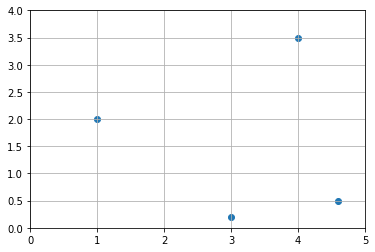

In [86]:
P = np.array([
        [3.0, 4.0, 1.0, 4.6],
        [0.2, 3.5, 2.0, 0.5]
    ])
x_coords_P, y_coords_P = P
plt.scatter(x_coords_P, y_coords_P)
plt.axis([0, 5, 0, 4])
plt.grid()
plt.show()

We could of course have stored the same 4 vectors as row vectors instead of columns vectors (this would have resulted in the transpose of P). But the choice is rather arbitrary. 

Since the vectors are ordered, you can see the matrix as a path and represent it with connected dots:

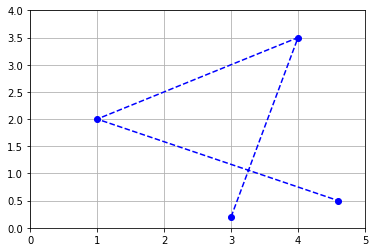

In [89]:
# plot the points
plt.plot(x_coords_P, y_coords_P, 'bo')
# plot the lines 
plt.plot(x_coords_P, y_coords_P, "b--")
plt.axis([0, 5, 0, 4])
plt.grid()
plt.show()

We can also represent the matrix as a polygon, matplot libs polygon class expects a $n \times 2$ NumPy array, not a $2 \times n$ array, we we just need to give it $P^T$ (because our matrix is 2 X $n$)

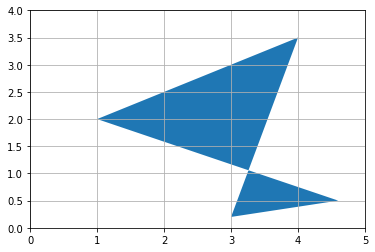

In [91]:
from matplotlib.patches import Polygon
plt.gca().add_artist(Polygon(P.T))
plt.axis([0, 5, 0, 4])
plt.grid()
plt.show()

### Geometric Applications of Matrix Operations 

We have seen earlier that vector addition caused geometric translation, vector multiplication by scalar resultsin in rescaling (zooming in or our, centered on the origin), and the vector dot product results in a projecting a vector onto another vector, rescaling and measurng the resulting coordinate. 

Similarly, matrix operations have useful geometric applications.

### Addition = Multiple Geometric Translations

First, adding two matrices together is equlivalent to adding all their vectors together. 

For example lets create another 2 X 4 matrix named $H$ and add it to P 

In [95]:
H = np.array([
        [ 0.5, -0.2, 0.2, -0.1],
        [ 0.4,  0.4, 1.5, 0.6]
    ])

In [97]:
P

array([[3. , 4. , 1. , 4.6],
       [0.2, 3.5, 2. , 0.5]])

In [96]:
P + H

array([[3.5, 3.8, 1.2, 4.5],
       [0.6, 3.9, 3.5, 1.1]])

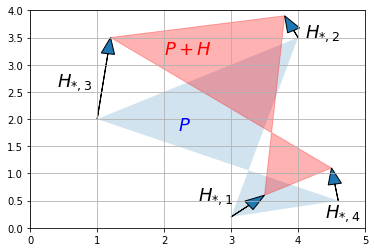

In [98]:
# assinging the translation to a new variable
P_moved = P + H

plt.gca().add_artist(Polygon(P.T, alpha=0.2))
plt.gca().add_artist(Polygon(P_moved.T, alpha=0.3, color="r"))
for vector, origin in zip(H.T, P.T):
    plot_vector_arrows(vector, origin=origin)

plt.text(2.2, 1.8, "$P$", color="b", fontsize=18)
plt.text(2.0, 3.2, "$P+H$", color="r", fontsize=18)
plt.text(2.5, 0.5, "$H_{*,1}$", color="k", fontsize=18)
plt.text(4.1, 3.5, "$H_{*,2}$", color="k", fontsize=18)
plt.text(0.4, 2.6, "$H_{*,3}$", color="k", fontsize=18)
plt.text(4.4, 0.2, "$H_{*,4}$", color="k", fontsize=18)

plt.axis([0, 5, 0, 4])
plt.grid()
plt.show()

This matrix addition results in all of the points moving the different locations, so the shape of the polygon changes. 

However if we add a matrix of the same values we simply get a geometic translation, lets make another 2 x 4 matrix of the same vectors

In [103]:
H2 = np.array([
        [-0.5, -0.5, -0.5, -0.5],
        [ 0.4,  0.4,  0.4,  0.4]
    ])

P_translated = P + H2
P_translated

array([[2.5, 3.5, 0.5, 4.1],
       [0.6, 3.9, 2.4, 0.9]])

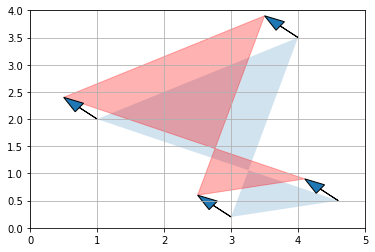

In [104]:
P_translated = P + H2

plt.gca().add_artist(Polygon(P.T, alpha=0.2))
plt.gca().add_artist(Polygon(P_translated.T, alpha=0.3, color="r"))
for vector, origin in zip(H2.T, P.T):
    plot_vector_arrows(vector, origin=origin)

plt.axis([0, 5, 0, 4])
plt.grid()
plt.show()

Although matrices can only be added together if they are the same size, NumPy allows adding of a row vector or a column vector to a matrix. This is called **'broadcasting'**, we could have obtained the same results as above using broadcasting with the code below.

In [106]:
P + [[-0.5], [0.4]]  # same as P + H2, thanks to NumPy broadcasting

array([[2.5, 3.5, 0.5, 4.1],
       [0.6, 3.9, 2.4, 0.9]])

### Scalar Multiplication 

Multiplying a matrix by a scaler results in all its vectors being multiplied by that scalar, so unsurprisingly, the geometirc result is a rescaling of the entire polygon. For example, lets rescale our polygong by a factor of 60% (so zooming out, ceneterd on the origin) 



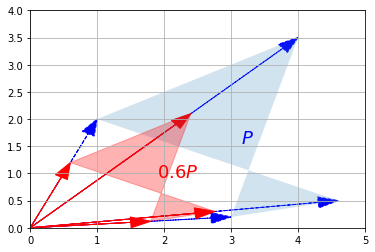

In [108]:
def plot_transformation(P_before, P_after, text_before, text_after, axis = [0, 5, 0, 4], arrows=False):
    if arrows:
        for vector_before, vector_after in zip(P_before.T, P_after.T):
            plot_vector_arrows(vector_before, color="blue", linestyle="--")
            plot_vector_arrows(vector_after, color="red", linestyle="-")
    plt.gca().add_artist(Polygon(P_before.T, alpha=0.2))
    plt.gca().add_artist(Polygon(P_after.T, alpha=0.3, color="r"))
    plt.text(P_before[0].mean(), P_before[1].mean(), text_before, fontsize=18, color="blue")
    plt.text(P_after[0].mean(), P_after[1].mean(), text_after, fontsize=18, color="red")
    plt.axis(axis)
    plt.grid()

# rescaling P by multiplying it by 0.6
P_rescaled = 0.60 * P
plot_transformation(P, P_rescaled, "$P$", "$0.6 P$", arrows=True)
plt.show()

### Matrix Multiplication - Projection onto an axis

Matrix muliplicatio is more complex to visualise, bt it also the most powerful tool in the box so we need to learn it!!!!!

Lets start simply, by defining a 1X2 matrix $U = \begin{bmatrix} 1 & 0 \end{bmatrix}$

In [118]:
U = np.array([[1,0]])
U

array([[1, 0]])

In [115]:
P

array([[3. , 4. , 1. , 4.6],
       [0.2, 3.5, 2. , 0.5]])

Lets look at the dot product of $U \cdot P$

In [120]:
U.dot(P)

array([[3. , 4. , 1. , 4.6]])

These are the horizontal coordinates of the vectors in P. In other words we just projected P onto the horizontal axis

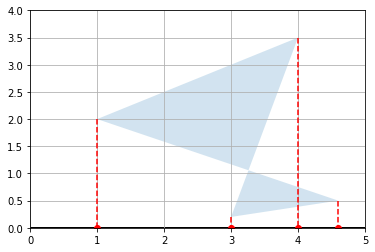

In [123]:
def plot_projection(U, P):
    U_P = U.dot(P)
    
    axis_end = 100 * U
    plot_vector_arrows(axis_end[0], color="black")

    plt.gca().add_artist(Polygon(P.T, alpha=0.2))
    for vector, proj_coordinate in zip(P.T, U_P.T):
        proj_point = proj_coordinate * U
        plt.plot(proj_point[0][0], proj_point[0][1], "ro")
        plt.plot([vector[0], proj_point[0][0]], [vector[1], proj_point[0][1]], "r--")

    plt.axis([0, 5, 0, 4])
    plt.grid()
    plt.show()

plot_projection(U, P)

We can actually project onto any axis, just by replacing U with any other unit vector. For example lets project on the axis that is at a 30 degree angle above the horizontal axis

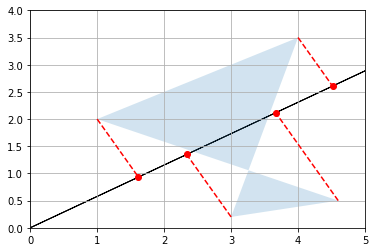

In [127]:
# creating the angle 30 variable
angle30 = 30 * np.pi / 180  # angle in radians
U_30 = np.array([[np.cos(angle30), np.sin(angle30)]])

plot_projection(U_30, P)

Thats that, now remeber that the dot product of a unit vector and a matrix basically performs a projection on an axis of some sort and it gives us the coordinates of the resulting points on the axis

### Matrix Multiplication - Rotation

Now let's create a 2 X 2 matrix $V$ containing two unit vectors that make 30 degree and 120 degree angles with the horizontal axis

$V = \begin{bmatrix} \cos(30°) & \sin(30°) \\ \cos(120°) & \sin(120°) \end{bmatrix}$

In [135]:
# creating the angle 120 variable
angle120 = 120 * np.pi / 180
V = np.array([
        [np.cos(angle30), np.sin(angle30)],
        [np.cos(angle120), np.sin(angle120)]
    ])


# lets look at V
V


array([[ 0.8660254,  0.5      ],
       [-0.5      ,  0.8660254]])

Matrix V is called a **rotation matrix**.

In [134]:
P

array([[3. , 4. , 1. , 4.6],
       [0.2, 3.5, 2. , 0.5]])

Lets look at the product of VP:

In [131]:
V.dot(P)

array([[ 2.69807621,  5.21410162,  1.8660254 ,  4.23371686],
       [-1.32679492,  1.03108891,  1.23205081, -1.8669873 ]])

We are getting slightly complex

The first row is equal to $V_{1,_*}P$, which is the coordinates of the prokection of $P$ onto the 30 degree axis, as we just done above. The second row is $V_{1_*}P$, which is the coordinates of the projection of P onto the 120 degree axis, so bascailly we have obtained the coordinates of P after rotation the horizontal and vertical axis by 30 degrees.

Lets plot the product of VP to see this

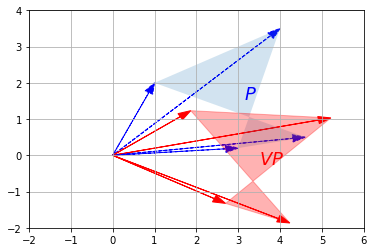

In [136]:
P_rotated = V.dot(P)
plot_transformation(P, P_rotated, "$P$", "$VP$", [-2, 6, -2, 4], arrows=True)
plt.show()

### Matrix Multiplication - Other Linear Transformations

We are going to be talking a lot about linear transformations here, but as someone who doesn't come from a high mathamatical background, I have done some of my own research here. I am adding my notes before continuing with the book as I feel I need to understand properly what linear transformations are before trying to use them in practice. 

### Linear Transformations 

A transformation is a fancy word for a function its takes and input and spits out an output. In the case of linear algebra, the function takes in a vector and spits out a vector (so what we have been doing above is also a linear transforamtion, we we have been doing with matrix projections and rotations are linear transformations (but the dot product isnt!!!!)) The word transformation suggests movement!!! Imagine the input vector moving to the location of the output vector. 

The linear part also plays significance, a transformation is linear if it has two properties all lines must remain lines (without curves) and the origin must remain in place (such as rotations around the origin for example) 

The tutorial describes this as thinking of having a graph with two basis vectors $\hat{i}, \hat{j}$. 

$\hat{i}$ is located at the x axis and $\hat{j}$ is located at the y axis. Basically, all of the vectors we plot of the grid are made up of certain amounts of $\hat{i} \hat{j}$ so if we have a vector 

$\begin{bmatrix}
-1 \\
2
\end{bmatrix}$

This is a point in space that can be made up of the basis vectors 

$\begin{bmatrix}
-1\times \hat{i} \\
2\times \hat{j}
\end{bmatrix}$

So we are making up our vectors using the basis vectors. Now basically what we can do with linear transformations is work out that the transformation does to the basis vectors, and simply go from there, so if we move the basis vectors in some linear transformation, we can find where our vector 
$\begin{bmatrix}
-1 \\
2
\end{bmatrix}$
would be by simplying building it up again using the the new location of the basis vectors!!!


So if we apply a linear transformation and the $\hat{i}$ lands on the point 
$\begin{bmatrix}
1 \\
-2
\end{bmatrix}$
and the $\hat{j}$ lands on the point
$\begin{bmatrix}
3 \\
0
\end{bmatrix}$

We use the same computation as above

$\begin{bmatrix}
-1\times \hat{i} \\
2\times \hat{j}
\end{bmatrix}$

Then we can work out the end point of our vector by 

V = $-1 \begin{bmatrix} 1\\ -2 \end{bmatrix} + 2\begin{bmatrix} 3\\ 0 \end{bmatrix}$

Which equals 

V = $ \begin{bmatrix} -1(1) + 2(3) \\ -1(-2) + 2(0) \end{bmatrix} = \begin{bmatrix} 5 \\ 2 \end{bmatrix}$

So that is how we work out where the vector is going to end up, we simply see origianlly what multiplcation it takes to get the where vector V ends. We then do the transformation, see where the basis vectors land, and apply their vectors to the same equation. 

Basically the whole linear transformation can be described in just 4 numbers, the coords of where $\hat{i}$ lands and the coords of where $\hat{j}$ lands

Commonly, these are given to us in a $2 \times 2$ vector, for example

$\begin{bmatrix}
1 & 3 \\
-2 & 0
\end{bmatrix}$

**NOTE** that $\hat{i}$ always seems to come first, that is because it is the x axis. 

But this means we can basically be given any vector at all, as long as we have the coordinates of $\hat{i}$ $\hat{j}$ we can do our computation

$\begin{bmatrix}
7\\
5
\end{bmatrix}$

$\begin{bmatrix}
7\times \hat{i} \\
5\times \hat{j}
\end{bmatrix}$

The coordinates of the basis vectors given to us in a 2X2 matrix

$\begin{bmatrix}
1 & 3 \\
-2 & 0
\end{bmatrix}$

Now all we have to do is to apply those coordinates to our little formular above

$7 \begin{bmatrix} 1\\ -2 \end{bmatrix} + 5\begin{bmatrix} 3\\ 0 \end{bmatrix}$

 = $ \begin{bmatrix} 7(1) + 5(3) \\ 7(-2) + 5(0) \end{bmatrix}$ = location of that vector after the linear transformation has taken place


**Lets make this much more general** where we have a 2X2 matrix of 

$\begin{bmatrix}
a & b \\
c & d
\end{bmatrix}$

Remeber that this matrix is just a way of packaging the information needed to describe a linear transformation, always make sure to interpreate ac as the place where the first basis vector lands ($\hat{i}$) and the second column bd as where the second basis vector lands $\hat{j}$

When we apply this transformation to the vector 

$\begin{bmatrix}
x \\
y
\end{bmatrix}$


Then what do we get????

$x \begin{bmatrix} a\\ c \end{bmatrix} + y\begin{bmatrix} b\\ d \end{bmatrix}$


 = $ \begin{bmatrix} x(a) + y(b) \\ x(c) + y(d) \end{bmatrix}$ 
 
**The short way to think about it is to just times the matrix by the vector** 

$\begin{bmatrix}
a & b \\
c & d
\end{bmatrix}$
$\times$
$\begin{bmatrix}
x \\
y
\end{bmatrix}$
= $ \begin{bmatrix} x(a) + y(b) \\ x(c) + y(d) \end{bmatrix}$ 



More generally, any linear transformation $f$ that maps n-dimensional vectors to m-dimensional vectors can be represented as an $m \times n$ matrix for example lets say that $u$ is a 3D vector



$\textbf{u} = \begin{pmatrix} x \\ y \\ z \end{pmatrix}$

and $f$ is defined as 

$f(\textbf{u}) = \begin{pmatrix}
    ax + by + cz \\
    dx + ey + fz
    \end{pmatrix}$
    
    
This transformation $f$ maps 3D vectors to 2D vectos in a linear way, the resulting coordinated only involve sums of multiples of the original coordinates. We can represent this transformation as matrix F:

$F = \begin{bmatrix}
    a & b & c \\
    d & e & f
    \end{bmatrix}$